# Import Libraries

In [4]:
! python -m pip install prophet


In [8]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Data Collection

In [11]:
data = pd.read_csv("/content/drive/MyDrive/TESLA/Dataset/TSLA.csv")

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


# Data Preprocessing & Data Visualization

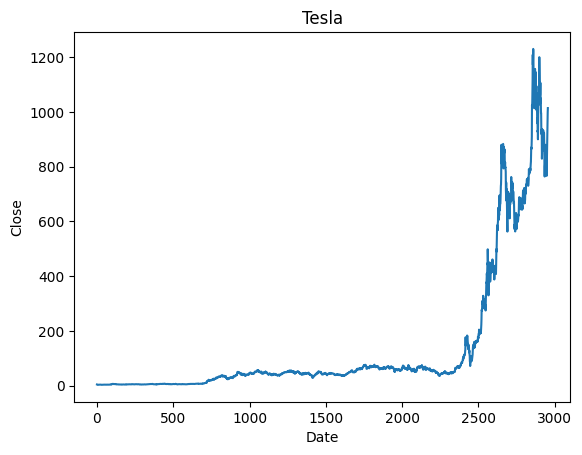

In [13]:
close = data['Close']

ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [16]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [18]:
data = data.rename(columns = {"Date" : "ds", "Close" : "y"})

# Model Selection

In [19]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods = 365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgpaic3lw/6oqswi41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgpaic3lw/03nnacab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23178', 'data', 'file=/tmp/tmpgpaic3lw/6oqswi41.json', 'init=/tmp/tmpgpaic3lw/03nnacab.json', 'output', 'file=/tmp/tmpgpaic3lw/prophet_model_4f_i16o/prophet_model-20240317183505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
3316,2023-03-20,1457.330133,1385.124978,1526.567277
3317,2023-03-21,1459.044084,1387.912333,1532.007237
3318,2023-03-22,1461.167517,1391.988222,1530.149212
3319,2023-03-23,1462.366839,1388.259579,1529.855675
3320,2023-03-24,1463.533078,1397.350096,1530.102432


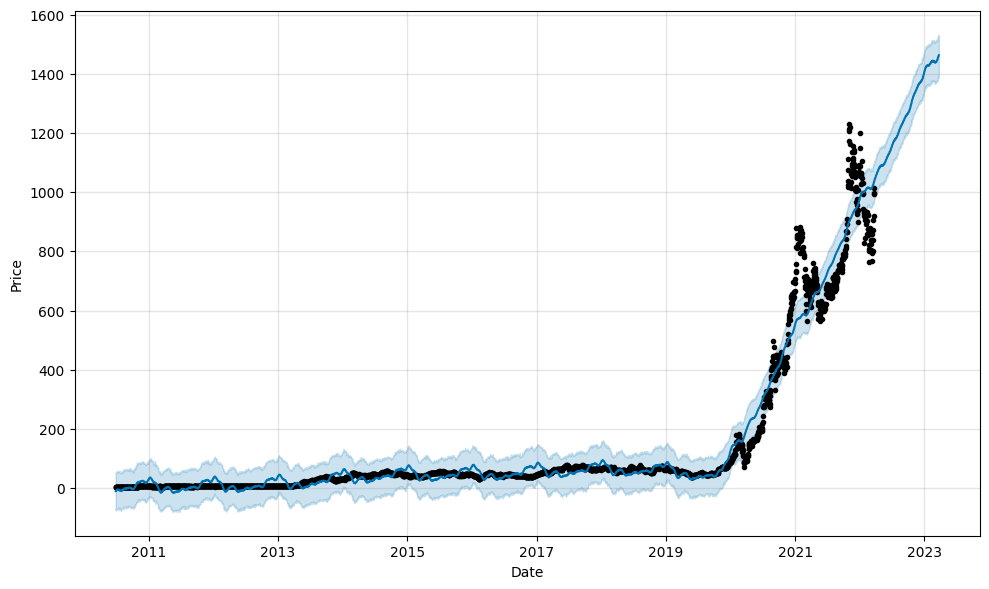

In [20]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

It seems like Tesla’s stock prices will increase in the coming future.